In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv('dairy_dataset.csv')

In [5]:
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [6]:
df.isnull().any()

Location                               False
Total Land Area (acres)                False
Number of Cows                         False
Farm Size                              False
Date                                   False
Product ID                             False
Product Name                           False
Brand                                  False
Quantity (liters/kg)                   False
Price per Unit                         False
Total Value                            False
Shelf Life (days)                      False
Storage Condition                      False
Production Date                        False
Expiration Date                        False
Quantity Sold (liters/kg)              False
Price per Unit (sold)                  False
Approx. Total Revenue(INR)             False
Customer Location                      False
Sales Channel                          False
Quantity in Stock (liters/kg)          False
Minimum Stock Threshold (liters/kg)    False
Reorder Qu

In [7]:
df[df.duplicated()]

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)


# Performance of dairy farms based on location, land area, and cow population

In [8]:
farm_performance = df.groupby(['Location', 'Total Land Area (acres)', 'Number of Cows']).agg({
    'Quantity Sold (liters/kg)': 'sum',
    'Approx. Total Revenue(INR)': 'sum',
    'Price per Unit (sold)': 'mean'
}).reset_index()

print(farm_performance)

         Location  Total Land Area (acres)  Number of Cows  \
0           Bihar                    11.86              80   
1           Bihar                    20.07              62   
2           Bihar                    22.83              72   
3           Bihar                    26.02              78   
4           Bihar                    27.37              50   
...           ...                      ...             ...   
4320  West Bengal                   967.64              55   
4321  West Bengal                   979.13              52   
4322  West Bengal                   984.53              24   
4323  West Bengal                   987.82              18   
4324  West Bengal                   990.93              39   

      Quantity Sold (liters/kg)  Approx. Total Revenue(INR)  \
0                           228                    10807.20   
1                           620                    10465.60   
2                           464                    16462.72   
3  

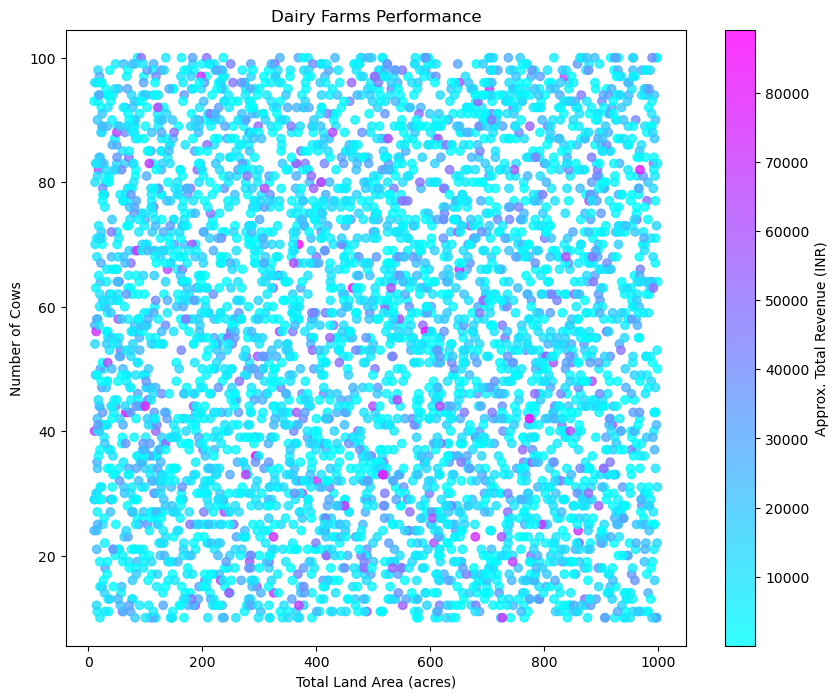

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(farm_performance['Total Land Area (acres)'], farm_performance['Number of Cows'],
            c=farm_performance['Approx. Total Revenue(INR)'], cmap='cool', alpha=0.8)
plt.xlabel('Total Land Area (acres)')
plt.ylabel('Number of Cows')
plt.title('Dairy Farms Performance')
plt.colorbar(label='Approx. Total Revenue (INR)')
plt.show()

# Sales and distribution patterns

In [11]:
product_sales = df.groupby(['Product Name', 'Brand', 'Location']).agg({
    'Quantity Sold (liters/kg)': 'sum',
    'Approx. Total Revenue(INR)': 'sum'
}).reset_index()

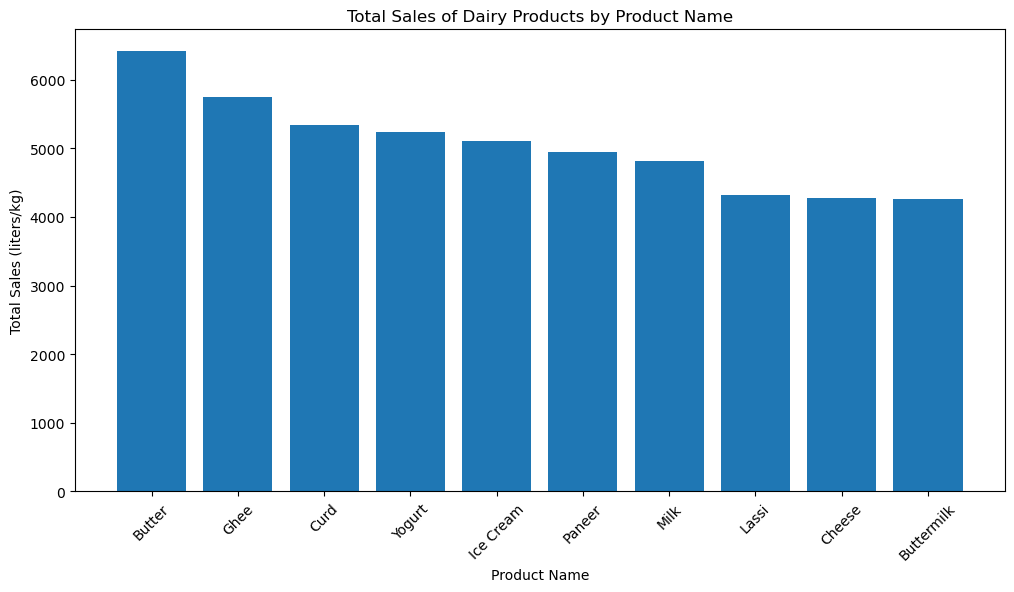

In [12]:
plt.figure(figsize=(12, 6))
product_sales_sorted = product_sales.sort_values('Quantity Sold (liters/kg)', ascending=False)
plt.bar(product_sales_sorted['Product Name'], product_sales_sorted['Quantity Sold (liters/kg)'])
plt.xlabel('Product Name')
plt.ylabel('Total Sales (liters/kg)')
plt.title('Total Sales of Dairy Products by Product Name')
plt.xticks(rotation=45)
plt.show()

# Impact of storage conditions and shelf life on the quality and availability of dairy products

In [16]:
storage_impact = df.groupby(['Storage Condition']).agg({
    'Quantity in Stock (liters/kg)': 'sum'
}).reset_index()

shelf_life_impact = df.groupby(['Shelf Life (days)']).agg({
    'Quantity in Stock (liters/kg)': 'sum'
}).reset_index()

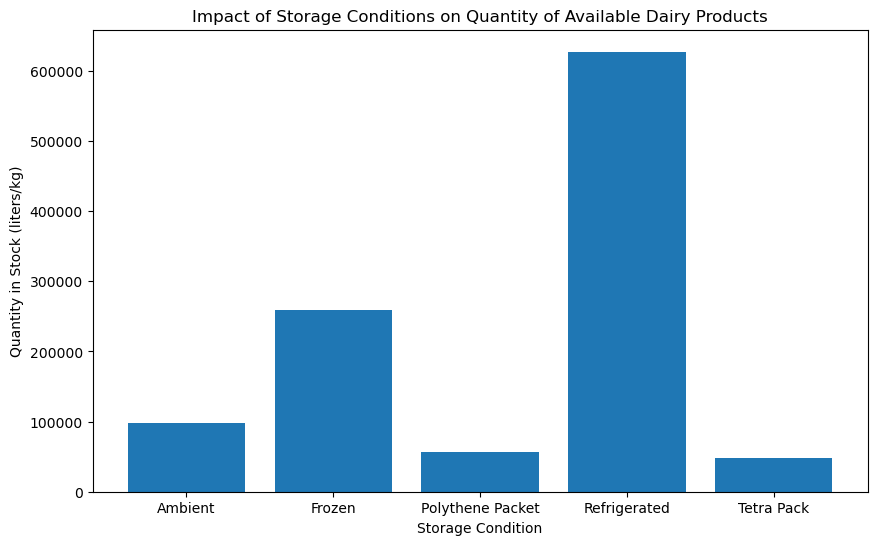

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(storage_impact['Storage Condition'], storage_impact['Quantity in Stock (liters/kg)'])
plt.xlabel('Storage Condition')
plt.ylabel('Quantity in Stock (liters/kg)')
plt.title('Impact of Storage Conditions on Quantity of Available Dairy Products')
plt.show()

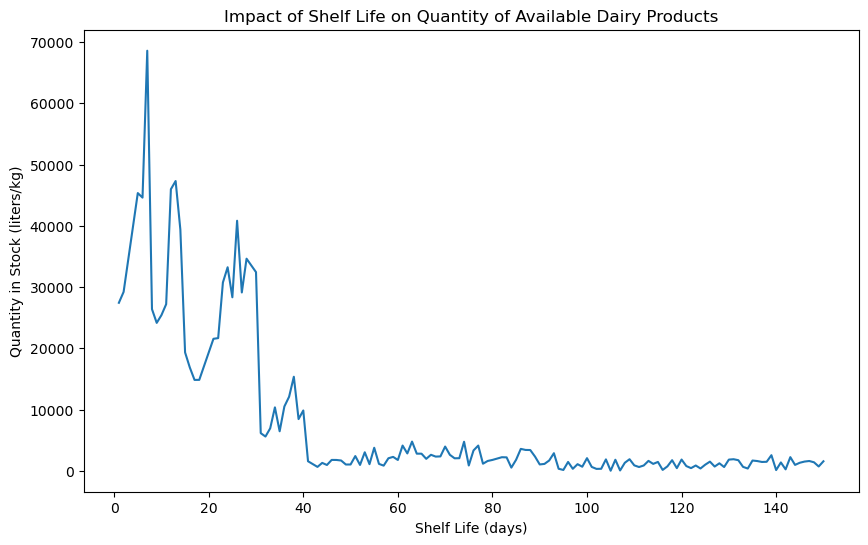

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(shelf_life_impact['Shelf Life (days)'], shelf_life_impact['Quantity in Stock (liters/kg)'])
plt.xlabel('Shelf Life (days)')
plt.ylabel('Quantity in Stock (liters/kg)')
plt.title('Impact of Shelf Life on Quantity of Available Dairy Products')
plt.show()

# Customer preferences and buying behavior based on location and sales channels

In [19]:
customer_preferences = df.groupby(['Location', 'Sales Channel']).agg({
    'Approx. Total Revenue(INR)': 'sum',
    'Quantity Sold (liters/kg)': 'sum'
}).reset_index()

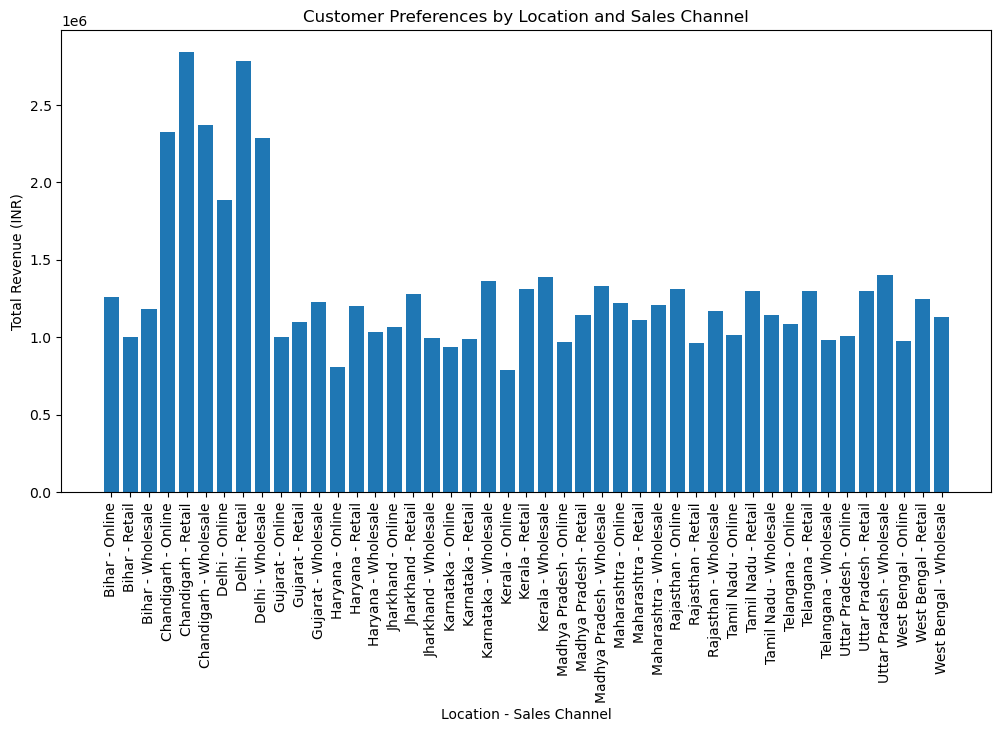

In [20]:
plt.figure(figsize=(12, 6))
x = customer_preferences['Location'] + ' - ' + customer_preferences['Sales Channel']
plt.bar(x, customer_preferences['Approx. Total Revenue(INR)'])
plt.xlabel('Location - Sales Channel')
plt.ylabel('Total Revenue (INR)')
plt.title('Customer Preferences by Location and Sales Channel')
plt.xticks(rotation=90)
plt.show()

In [21]:
buying_behavior = df.groupby(['Location', 'Sales Channel']).agg({
    'Quantity Sold (liters/kg)': 'mean',
    'Price per Unit (sold)': 'mean'
}).reset_index()

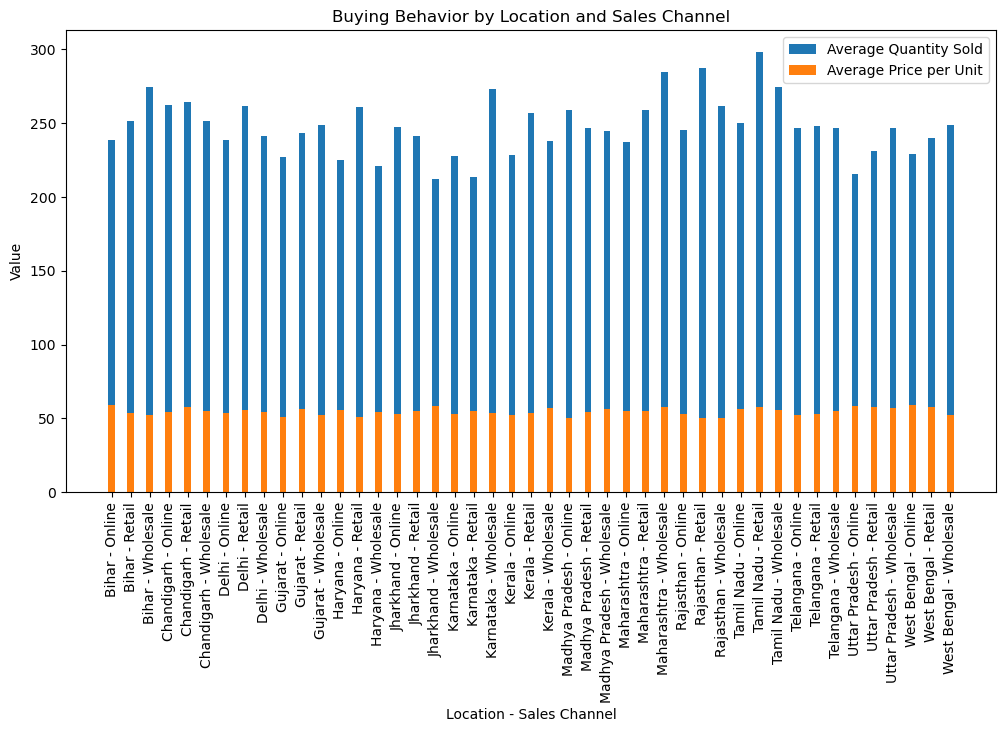

In [22]:
plt.figure(figsize=(12, 6))
x = buying_behavior['Location'] + ' - ' + buying_behavior['Sales Channel']
width = 0.35
plt.bar(x, buying_behavior['Quantity Sold (liters/kg)'], width, label='Average Quantity Sold')
plt.bar(x, buying_behavior['Price per Unit (sold)'], width, label='Average Price per Unit')
plt.xlabel('Location - Sales Channel')
plt.ylabel('Value')
plt.title('Buying Behavior by Location and Sales Channel')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [23]:
inventory_metrics = df.groupby('Product Name').agg({
    'Quantity in Stock (liters/kg)': 'sum',
    'Minimum Stock Threshold (liters/kg)': 'mean',
    'Reorder Quantity (liters/kg)': 'mean'
}).reset_index()

In [24]:
reorder_products = inventory_metrics[inventory_metrics['Quantity in Stock (liters/kg)'] < inventory_metrics['Minimum Stock Threshold (liters/kg)']]

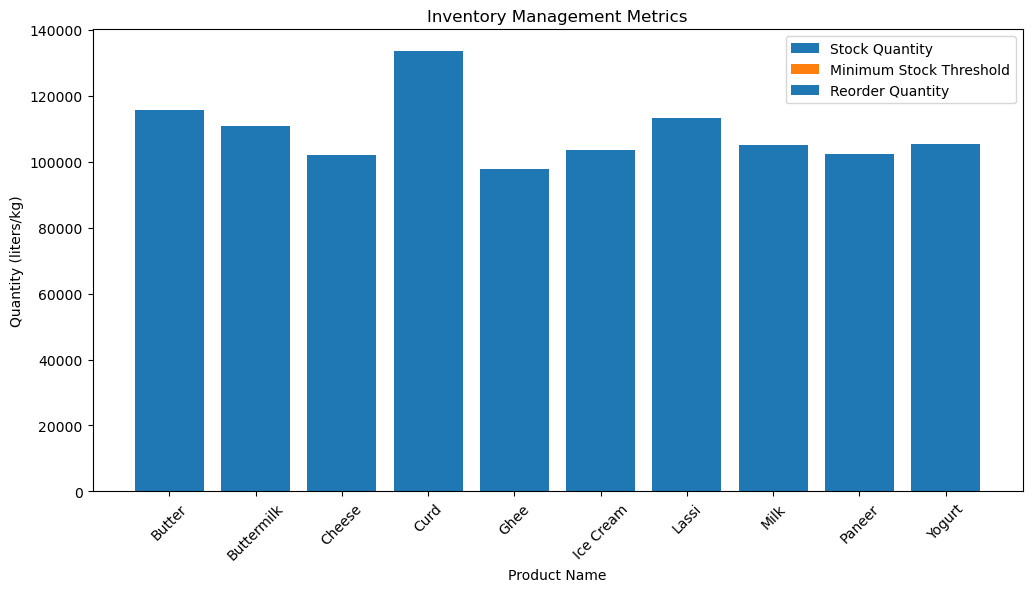

In [25]:
plt.figure(figsize=(12, 6))
x = inventory_metrics['Product Name']
plt.bar(x, inventory_metrics['Quantity in Stock (liters/kg)'], label='Stock Quantity')
plt.bar(x, inventory_metrics['Minimum Stock Threshold (liters/kg)'], label='Minimum Stock Threshold')
plt.bar(reorder_products['Product Name'], reorder_products['Reorder Quantity (liters/kg)'], label='Reorder Quantity', color='red')
plt.xlabel('Product Name')
plt.ylabel('Quantity (liters/kg)')
plt.title('Inventory Management Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Trend analysis in the dairy industry

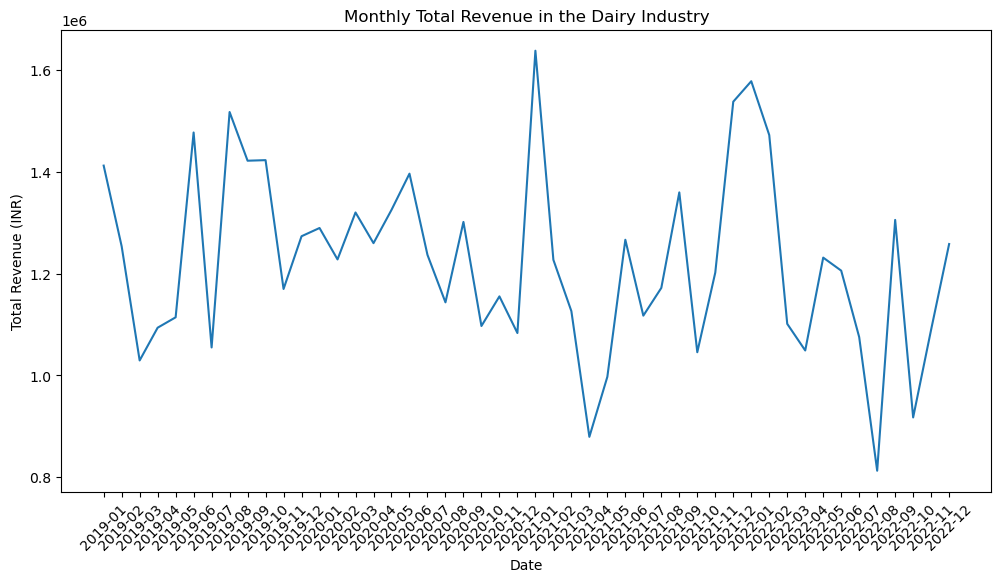

In [28]:
monthly_revenue = df.groupby(pd.to_datetime(df['Date']).dt.to_period('M')).agg({
    'Approx. Total Revenue(INR)': 'sum'
}).reset_index()

monthly_revenue['Date'] = monthly_revenue['Date'].astype(str)  # Convert 'Date' column back to string format

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Date'], monthly_revenue['Approx. Total Revenue(INR)'])
plt.xlabel('Date')
plt.ylabel('Total Revenue (INR)')
plt.title('Monthly Total Revenue in the Dairy Industry')
plt.xticks(rotation=45)
plt.show()

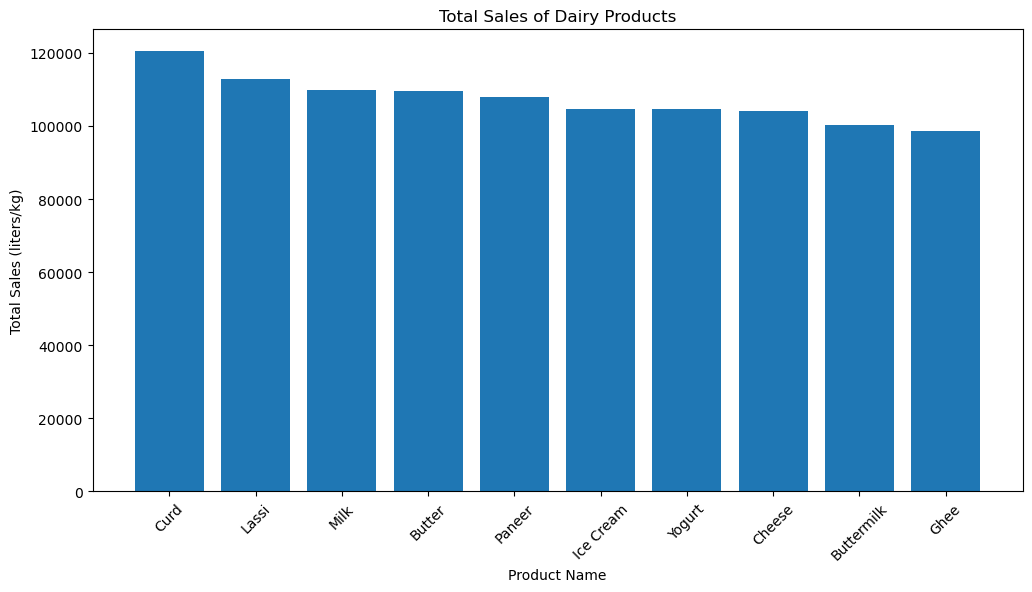

In [30]:
product_sales = df.groupby('Product Name').agg({
    'Quantity Sold (liters/kg)': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
product_sales_sorted = product_sales.sort_values('Quantity Sold (liters/kg)', ascending=False)
plt.bar(product_sales_sorted['Product Name'], product_sales_sorted['Quantity Sold (liters/kg)'])
plt.xlabel('Product Name')
plt.ylabel('Total Sales (liters/kg)')
plt.title('Total Sales of Dairy Products')
plt.xticks(rotation=45)
plt.show()

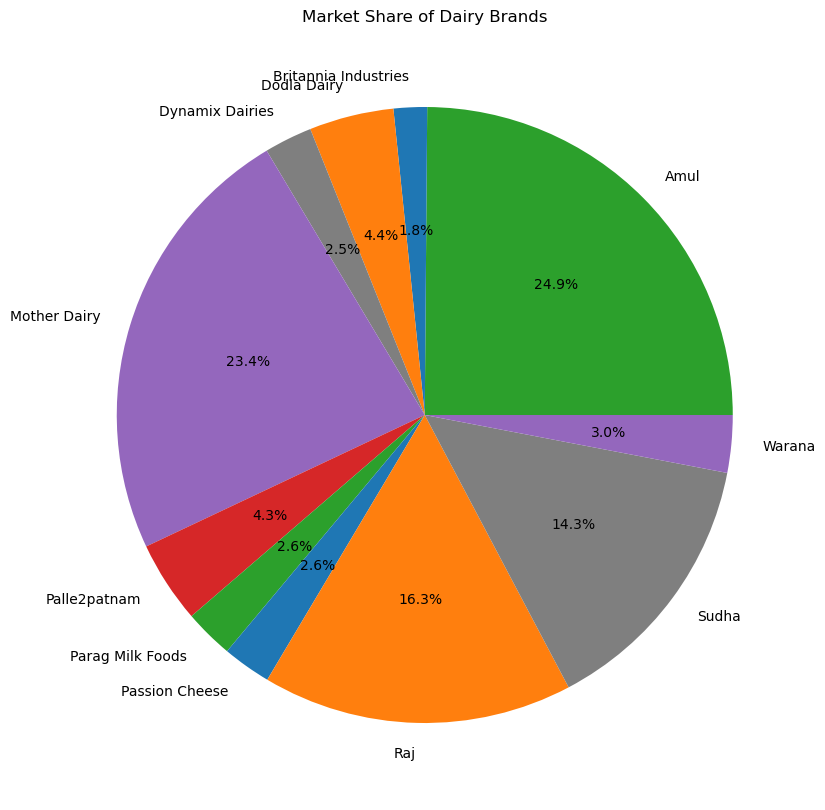

In [31]:
brand_market_share = df.groupby('Brand').agg({
    'Approx. Total Revenue(INR)': 'sum'
}).reset_index()

plt.figure(figsize=(10, 10))  
colors = ['tab:green', 'tab:blue', 'tab:orange', 'tab:gray', 'tab:purple' , 'tab:red']  # Specify custom colors

plt.pie(brand_market_share['Approx. Total Revenue(INR)'],
        labels=brand_market_share['Brand'],
        autopct='%1.1f%%',
        colors=colors)  
plt.title('Market Share of Dairy Brands')
plt.show()

C:\Users\sam72\AppData\Local\Temp\ipykernel_13168\2911819436.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

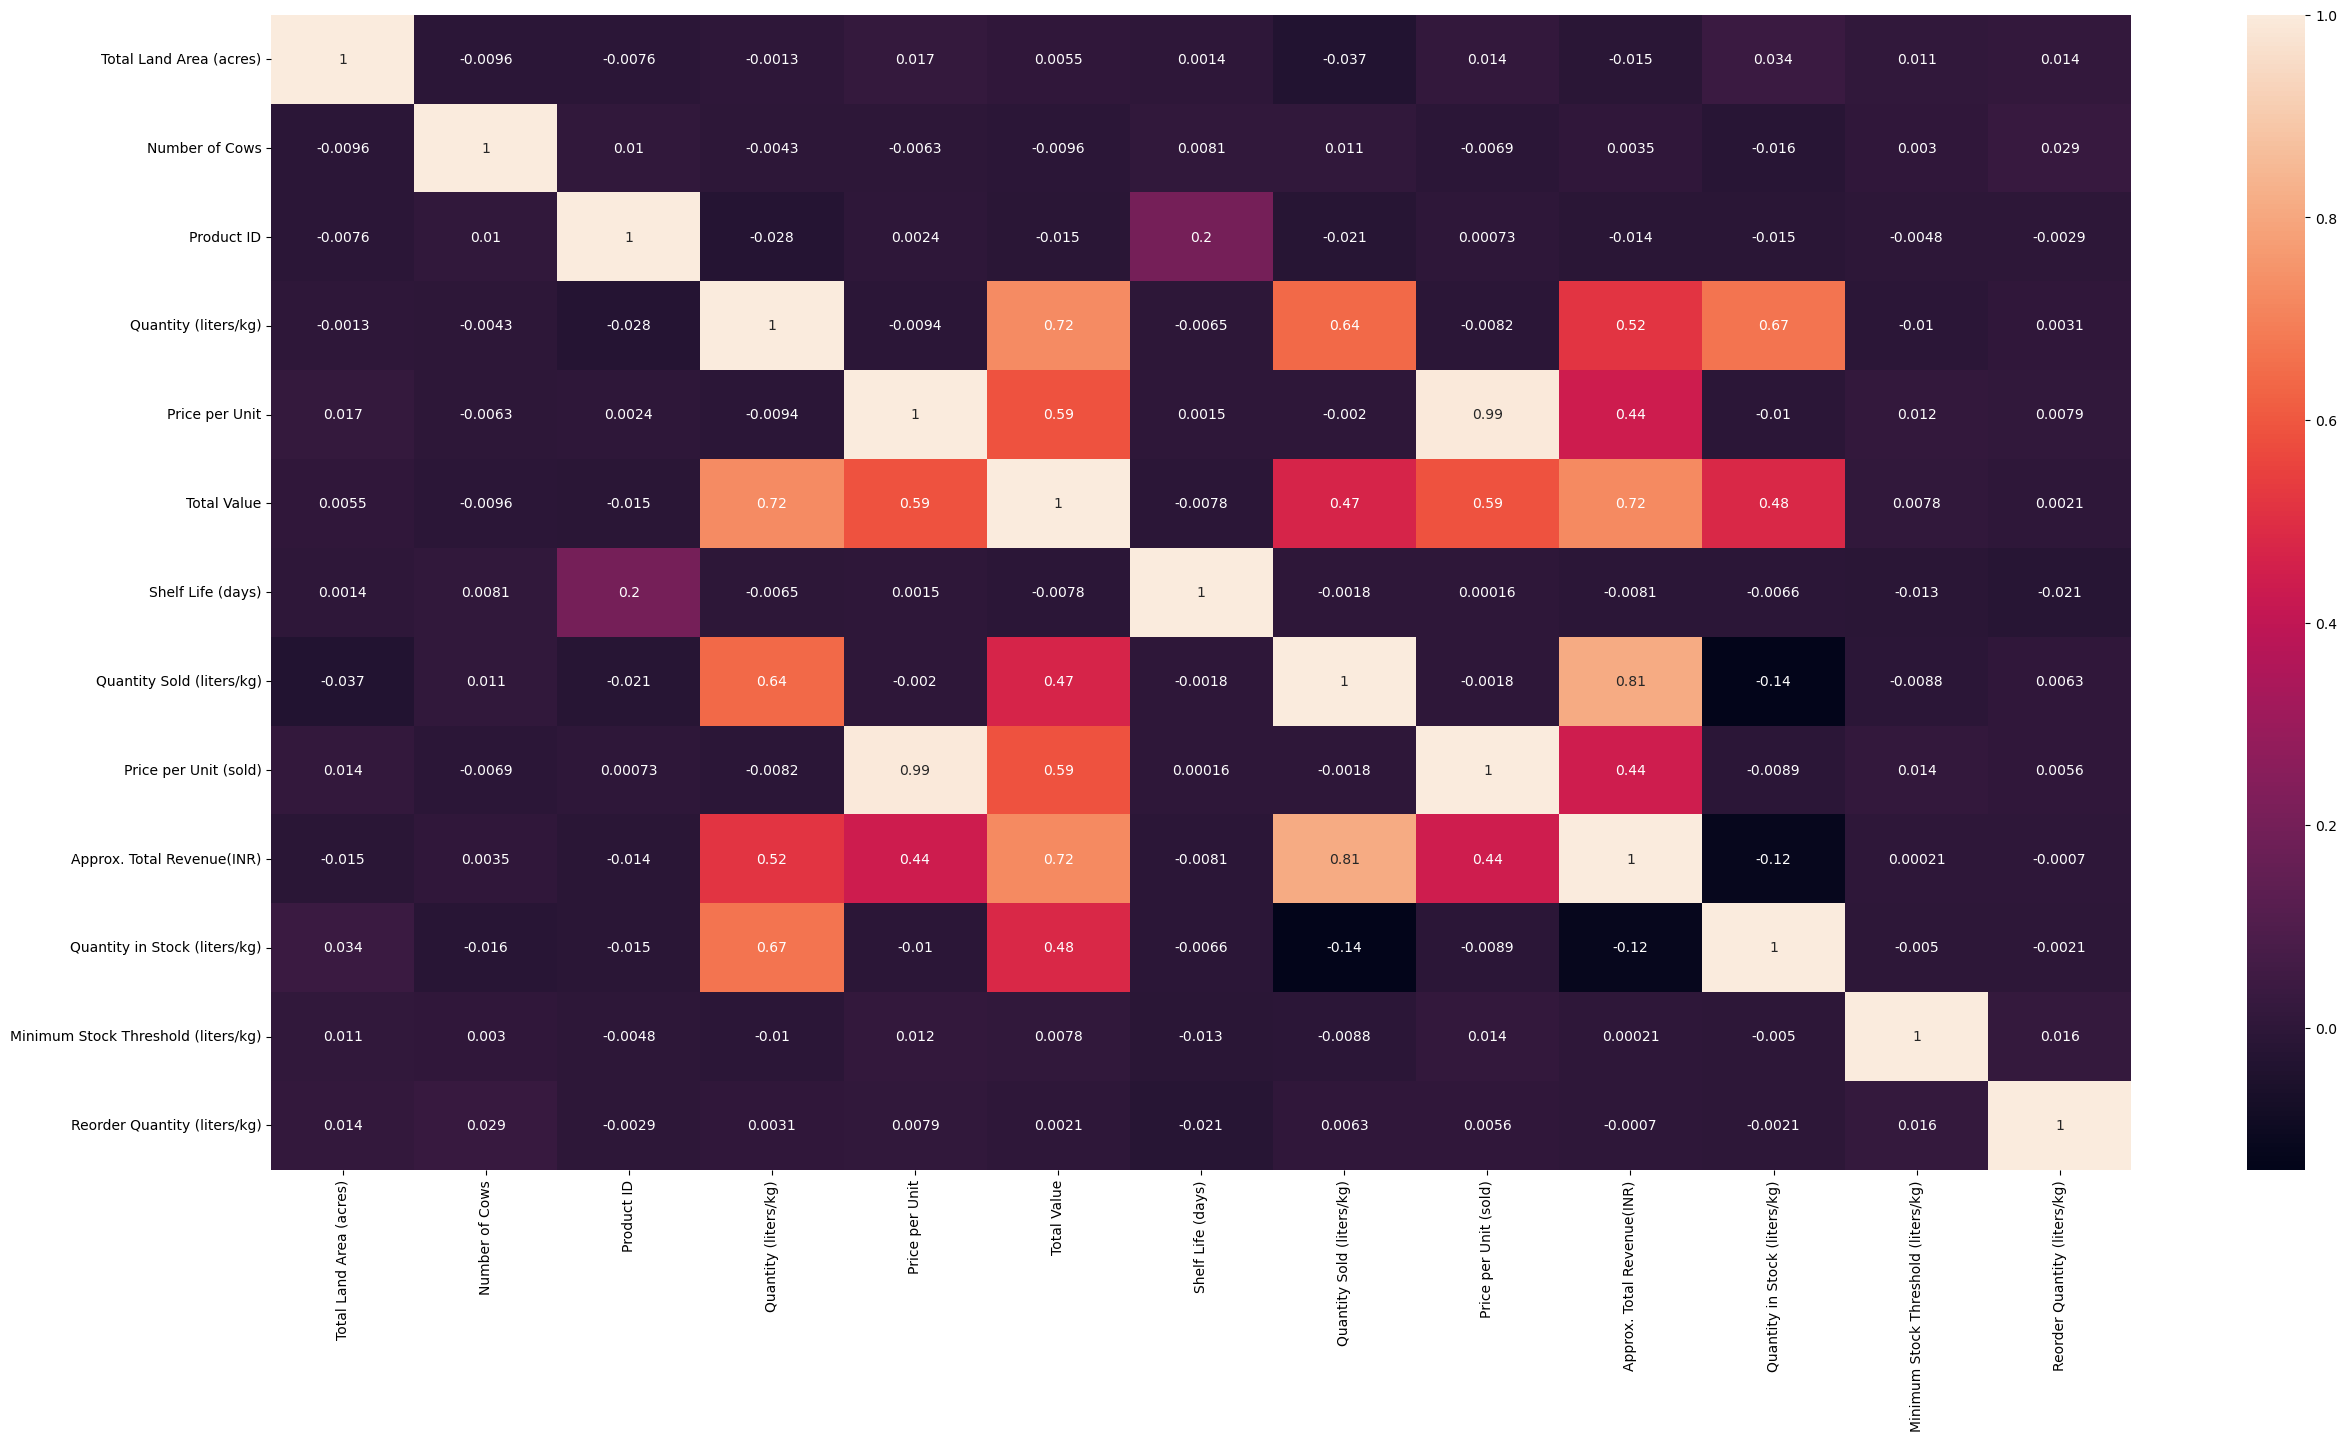

In [33]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)

In [13]:
x=df1=df.drop(df.columns[[0,3,6,7,12,18,19,4,13,14,22,8,11,5,1]],axis=1)
df1

,Number of Cows,Price per Unit,Total Value,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg)
0,96,85.72,19064.1280,7,82.24,575.68,215,19.55
1,44,42.61,29293.5228,558,39.24,21895.92,129,43.17
2,24,36.50,18377.0200,256,33.81,8655.36,247,15.10
3,89,26.52,21835.5072,601,28.92,17380.92,222,74.50
4,21,83.85,12390.5145,145,83.07,12045.15,2,76.02
...,...,...,...,...,...,...,...,...
4320,89,88.45,49080.9050,352,87.20,30694.40,202,98.07
4321,29,55.35,45294.5655,68,58.39,3970.52,750,87.41
4322,65,92.61,54043.4916,141,89.46,12613.86,442,33.47
4323,90,15.30,47.4300,2,10.56,21.12,1,58.25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

In [14]:
x

,Number of Cows,Price per Unit,Total Value,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg)
0,96,85.72,19064.1280,7,82.24,575.68,215,19.55
1,44,42.61,29293.5228,558,39.24,21895.92,129,43.17
2,24,36.50,18377.0200,256,33.81,8655.36,247,15.10
3,89,26.52,21835.5072,601,28.92,17380.92,222,74.50
4,21,83.85,12390.5145,145,83.07,12045.15,2,76.02
...,...,...,...,...,...,...,...,...
4320,89,88.45,49080.9050,352,87.20,30694.40,202,98.07
4321,29,55.35,45294.5655,68,58.39,3970.52,750,87.41
4322,65,92.61,54043.4916,141,89.46,12613.86,442,33.47
4323,90,15.30,47.4300,2,10.56,21.12,1,58.25


In [16]:
y=df['Approx. Total Revenue(INR)']
y

0         575.68
1       21895.92
2        8655.36
3       17380.92
4       12045.15
          ...   
4320    30694.40
4321     3970.52
4322    12613.86
4323       21.12
4324    18577.35
Name: Approx. Total Revenue(INR), Length: 4325, dtype: float64

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
ss=StandardScaler()
x_train=ss.fit_transform(X_train)
x_test=ss.transform(X_test)

In [19]:
modellr=LinearRegression()
modellr.fit(x_train,Y_train)

LinearRegression()

In [21]:
predlr=modellr.predict(x_test)
acclr=r2_score(Y_test,predlr)
acclr

1.0

In [22]:
predlr1=modellr.predict(x_train)
acclr1=r2_score(Y_train,predlr1)
acclr1

1.0

In [23]:
modeldt=DecisionTreeRegressor()
modeldt.fit(x_train,Y_train)

DecisionTreeRegressor()

In [24]:
preddt=modeldt.predict(x_test)
accdt=r2_score(Y_test,preddt)
accdt

0.9999094969615209

In [25]:
preddt=modeldt.predict(x_train)
accdt=r2_score(Y_train,preddt)
accdt

1.0

In [26]:
modelkn=KNeighborsRegressor()
modelkn.fit(x_train,Y_train)

KNeighborsRegressor()

In [27]:
predkn=modelkn.predict(x_test)
acckn=r2_score(Y_test,predkn)
acckn

0.9866014282707111

In [28]:
predkn=modelkn.predict(x_train)
acckn=r2_score(Y_train,predkn)
acckn

0.9912861974269893

In [29]:
modelrf=RandomForestRegressor()
modelrf.fit(x_train,Y_train)

RandomForestRegressor()

In [30]:
predrf=modelrf.predict(x_train)
accrf=r2_score(Y_train,predrf)
accrf

0.9999916164160709

In [31]:
predrf=modelrf.predict(x_test)
accrf=r2_score(Y_test,predrf)
accrf

0.9999605509764964

In [32]:
modelnv= SVR()
modelnv=modelnv.fit(x_train,Y_train)
prednv=modelnv.predict(x_test)


In [33]:
accnv=r2_score(Y_test,prednv)
accnv

-0.12558185299005187

In [34]:
prednv=modelnv.predict(x_train)
accnv=r2_score(Y_train,prednv)
accnv

-0.1015182108382453

In [35]:
import pickle

In [36]:
with open("modelkn.pkl", "wb") as f: 
    pickle.dump(modelkn, f)

In [39]:
with open("modelkn.pkl", "rb") as f:
    model = pickle.load(f)
prediction = model.predict([[96,85.72,19064.1280,7,82.24,575.68,215,19.55
]])
print("The result is",prediction[0])

The result is 59427.615999999995


In [40]:
ans = model.predict([[96,85.72,19064.1280,7,82.24,575.68,215,19.55
]])

In [41]:
round(ans[0],2)

59427.62

In [42]:
pickle.dump(ss,open('Scaler.pkl','wb'))

In [43]:
pickle.dump(le_col,open('label.pkl','wb'))